# Sales Prediction 

In [1]:
# Libraries

# data manipulation
import pandas as pd 

# plotting

import matplotlib.pyplot as plt

import seaborn as sns

# Machine Learning 

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# split data 

from sklearn.model_selection import train_test_split

# accuracy
from sklearn.metrics import mean_absolute_error

In [2]:
# load file
# index column based on Unnamed: 0
df = pd.read_csv("Downloads/Advertising.csv",index_col = 'Unnamed: 0')

df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


## Assumtions 

- as no information regarding the data is given some of the assumtion made are as followes:

**TV** : represents the amount of money spent on TV advertising

**Newspaper** : This column represents the amount of money spent on newspaper advertising

**radio** : This column represents the amount of money spent on radio advertising

**Sales**  This column represents the sales figures that are achieved corresponding to the advertising expenditure in TV, Radio, and Newspaper.

**Units or currency ised is unknown**

## Define Problem: 

Predict the sales of products

# Data Prep

**Data Cleaning**

In [3]:
# there are no missing values 
# all data types are floats
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


**EDA**

<Axes: >

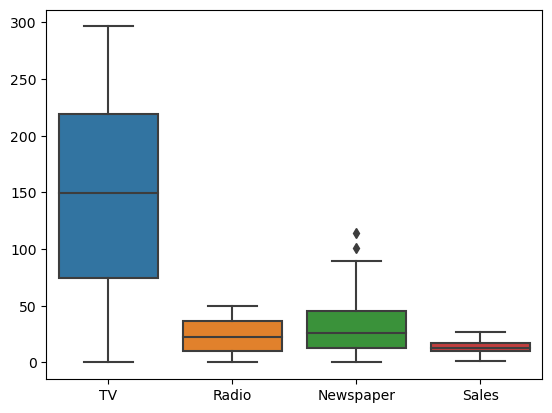

In [4]:
sns.boxplot(data= df)

- we can see that there are some outliers in newspaper so we will remove those outliers or impute them.

In [5]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculate the median of the column
median_newspaper = df['Newspaper'].median()

In [6]:
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Median:", median_newspaper)

Q1: 12.75
Q3: 45.1
IQR: 32.35
Lower Bound: -35.775000000000006
Upper Bound: 93.625
Median: 25.75


In [7]:
# Replace outlier with median

df['Newspaper'] = df['Newspaper'].apply(lambda x: median_newspaper if x > upper_bound or x < lower_bound else x)



<Axes: >

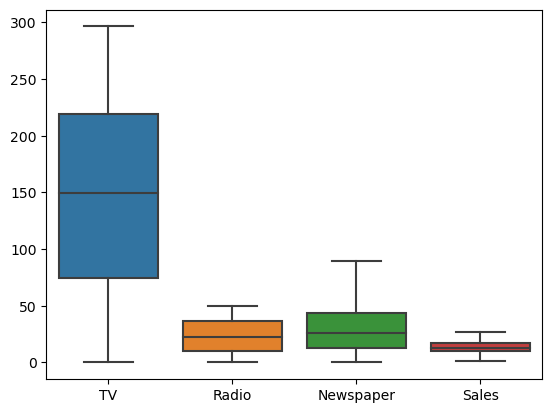

In [8]:
# new output
sns.boxplot(data= df )

In [9]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Train a Model 

+ We choose for this machine learning project Linear Regression algorithm this will help in predictng sales price of TV, Radio, and Newspaper

**Split Data**

In [10]:
X = df.drop('Sales',axis = 1)

y = df['Sales']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 42)

**Linear Regression model**

In [12]:
LR = LinearRegression()
LR

LinearRegression()

In [13]:
LR.fit(X_train,y_train)

LinearRegression()

In [14]:
prediction = LR.predict(X_test)
prediction

array([16.37516878, 20.92223369, 21.61337898, 10.48546649, 22.20303253,
       13.01791749, 21.11420367,  7.31962728, 13.57228717, 15.12291625,
        8.93946863,  6.49261545, 14.26701237,  8.7842258 ,  9.58212372,
       12.08817162,  8.58994144, 16.26413221, 10.16673733, 18.87228047,
       19.56143279, 12.93858841, 12.26579131, 21.33586587,  7.70676623,
        5.64346817, 20.80490942, 11.91827415,  9.06398829,  8.38798291,
       12.40795381,  9.89916746, 21.42171662, 12.11530527, 18.28438126,
       20.2013917 , 14.01217105, 20.88906686, 10.94242836,  4.38355012,
        9.58099984, 12.6268183 ,  9.93592621,  8.07030243, 13.45825686,
        5.25875537,  9.14511273, 14.10280757,  8.70203985, 11.55985811])

# Accuracy Test

In [15]:
mae = mean_absolute_error(y_test, prediction)
mae

1.3956722398171346

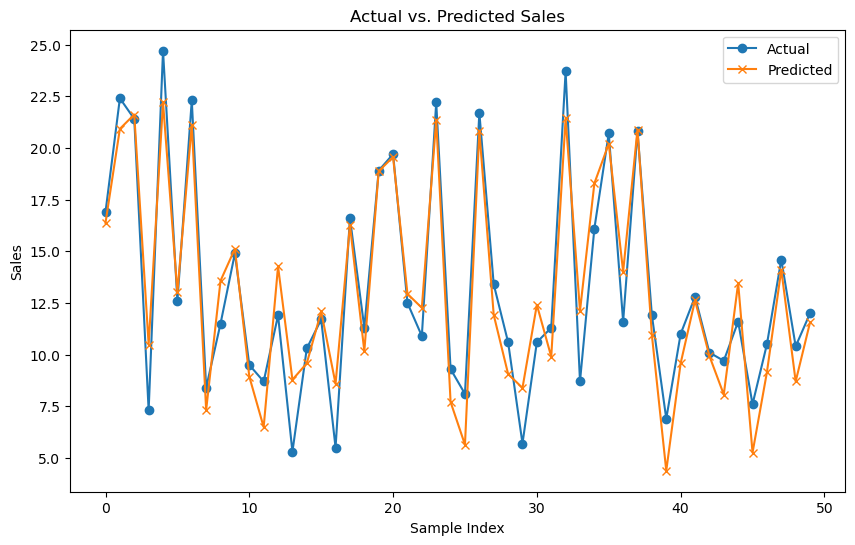

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(prediction, label='Predicted', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()

- a value of 1.40 states that our model is off by 1.40 units. Below we will try to decrease that number by improving that model.

# Model Improvment

+ By using the Random Forest Regressor, we find that our MAE decreases by almost 50%. The plot provided below shows that the Random Forest Regressor is the best model for our sales/advertising data.

In [17]:
RND = RandomForestRegressor()

In [18]:
RND.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
pred = RND.predict(X_test)
pred

array([17.598, 21.734, 20.644,  6.742, 23.086, 13.002, 22.485,  9.714,
       12.047, 16.021,  7.484,  9.118, 12.239,  4.576, 10.481, 12.426,
        6.532, 16.823, 11.259, 19.583, 19.994, 12.086, 10.741, 21.908,
       10.017,  9.075, 22.188, 12.739, 10.214,  5.002, 11.444, 10.835,
       22.002,  8.348, 15.234, 20.476, 12.337, 20.64 , 12.476,  7.71 ,
       11.382, 12.87 , 10.289,  9.727, 11.787,  9.139, 10.959, 15.54 ,
       10.7  , 11.679])

In [20]:
mae = mean_absolute_error(y_test, pred)
mae

0.6094799999999998

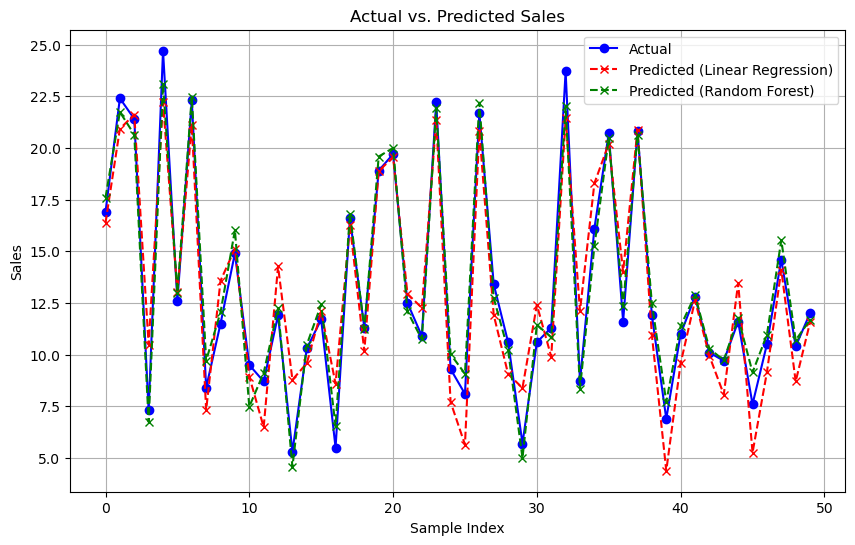

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(prediction, label='Predicted (Linear Regression)', marker='x', linestyle='--', color='red')
plt.plot(pred, label='Predicted (Random Forest)', marker='x', linestyle='--', color='green')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()